# Spectral lines
****
- Data source: Dr. Michel Curé and Catalina Arcos, IFA UV
- Each model is stored in a file with a name like: "t4000g20v10.dat", where
 - t is the effective temperature: 4000 [K]
 - g is 10 times the logarithm of the gravity in [cm/seg^2]: 20/10 = 2.0
 - v_rot is the rotational velocity in [km/seg]: 10
 
- For this analysis we will consider:
 - log g >= a 30 (3.0)
 - v_rot >= 100
 - t_eff >= 15000
 - wavelength range [4460, 4480]

- Note that the y axis is the normalized flux

# Needed libraries
*****

In [10]:
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import shutil

from sklearn.model_selection import train_test_split

# Functions
*****

In [24]:
def string2params(string, show=True):
    s1 = string.partition("g")
    t = s1[0][1:]
    s2 = s1[2].partition("v")
    g = s2[0]
    v = s2[-1]
    if show:
        print(s1)
        print("t:",t)
        print(s2)
        print("g: ",float(g)/10)
        print("v:", v)
    return float(t), float(g)/10, float(v)

def histograms_params(train, test, val, bins, labels, title=None):
    plt.figure()
    plt.hist(train, bins='auto', label=labels[0])
    if val is not None:
        plt.hist(val, bins='auto', label=labels[0])
    if test is not None:
        plt.hist(test, bins='auto', label=labels[0], alpha=0.3)
    
    if title is not None:
        plt.title(title)
    plt.legend(loc="best")
    plt.show()
    
def train_val_test_split(X, y, train_size, val_size, test_size, random_state = 1):
    if train_size + val_size + test_size != 1.0:
        print("Incorrect sizes!")
        return None
    
    X_tmp, X_test, y_tmp, y_test = train_test_split(X, y, test_size = test_size, random_state=random_state)
    X_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size = val_size/(test_size + train_size), random_state=random_state)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Reading files
*****

In [25]:
files = glob.glob('filtered_wv_models/*')
m = len(files)
print("Number of files in models", m)
print("5 first files: \n", files[0:5])

Number of files in models 3875
5 first files: 
 ['filtered_wv_models/f_t17000g30v170.dat', 'filtered_wv_models/f_t19000g45v220.dat', 'filtered_wv_models/f_t30000g45v230.dat', 'filtered_wv_models/f_t38000g45v300.dat', 'filtered_wv_models/f_t20000g30v260.dat']


# Plotting files
*****

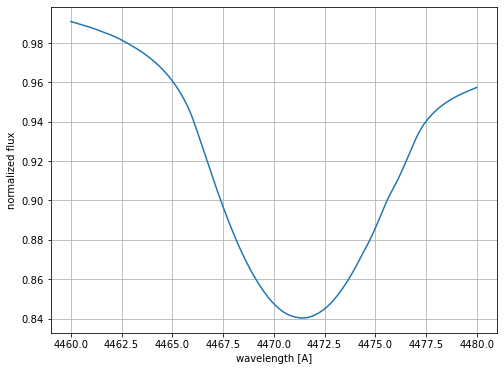

In [26]:
df_line = pd.read_csv("filtered_wv_models/f_t24000g50v370.dat", sep=" ", header=None)

# Plot
plt.figure(figsize=(8,6))
plt.plot(df_line[0].values, df_line[1].values)
plt.xlabel("wavelength [A]")
plt.ylabel("normalized flux")
plt.grid()
plt.show()

In [27]:
print("--> X has dimension", m, " x 201")
print("--> y has diemsnion", m, " x 3")

--> X has dimension 3875  x 201
--> y has diemsnion 3875  x 3


In [28]:
y = np.zeros((m,3))
df = pd.read_csv(files[0], sep=" ", header=None)
x_points = df[0].values
n_points, n_columns = df.shape
display(df[1].values.shape)
print("Num. of points in x axis: ", n_points)

(201,)

Num. of points in x axis:  201


In [29]:
# X matrix contains the spectral lines
X = np.zeros((m,n_points))
# y matrix contains the labels of each spectral line
y = np.zeros((m,3))
for i,name in enumerate(files):
    file_name = name.split("/")[-1].split(".")[0]
    print(file_name)
    df = pd.read_csv(name, sep=" ", header=None)
    print(file_name.split("_")[1])
    t,g,v = string2params(file_name.split("_")[1])
    X[i,:] = df[1].values
    y[i] = t,g,v
    #print("----")
    

f_t17000g30v170
t17000g30v170
('t17000', 'g', '30v170')
t: 17000
('30', 'v', '170')
g:  3.0
v: 170
f_t19000g45v220
t19000g45v220
('t19000', 'g', '45v220')
t: 19000
('45', 'v', '220')
g:  4.5
v: 220
f_t30000g45v230
t30000g45v230
('t30000', 'g', '45v230')
t: 30000
('45', 'v', '230')
g:  4.5
v: 230
f_t38000g45v300
t38000g45v300
('t38000', 'g', '45v300')
t: 38000
('45', 'v', '300')
g:  4.5
v: 300
f_t20000g30v260
t20000g30v260
('t20000', 'g', '30v260')
t: 20000
('30', 'v', '260')
g:  3.0
v: 260
f_t35000g30v280
t35000g30v280
('t35000', 'g', '30v280')
t: 35000
('30', 'v', '280')
g:  3.0
v: 280
f_t28000g30v350
t28000g30v350
('t28000', 'g', '30v350')
t: 28000
('30', 'v', '350')
g:  3.0
v: 350
f_t34000g35v320
t34000g35v320
('t34000', 'g', '35v320')
t: 34000
('35', 'v', '320')
g:  3.5
v: 320
f_t15000g35v200
t15000g35v200
('t15000', 'g', '35v200')
t: 15000
('35', 'v', '200')
g:  3.5
v: 200
f_t31000g50v390
t31000g50v390
('t31000', 'g', '50v390')
t: 31000
('50', 'v', '390')
g:  5.0
v: 390
f_t18000g5

t31000g45v160
('t31000', 'g', '45v160')
t: 31000
('45', 'v', '160')
g:  4.5
v: 160
f_t16000g30v220
t16000g30v220
('t16000', 'g', '30v220')
t: 16000
('30', 'v', '220')
g:  3.0
v: 220
f_t37000g30v300
t37000g30v300
('t37000', 'g', '30v300')
t: 37000
('30', 'v', '300')
g:  3.0
v: 300
f_t27000g45v350
t27000g45v350
('t27000', 'g', '45v350')
t: 27000
('45', 'v', '350')
g:  4.5
v: 350
f_t21000g30v130
t21000g30v130
('t21000', 'g', '30v130')
t: 21000
('30', 'v', '130')
g:  3.0
v: 130
f_t33000g45v180
t33000g45v180
('t33000', 'g', '45v180')
t: 33000
('45', 'v', '180')
g:  4.5
v: 180
f_t26000g45v160
t26000g45v160
('t26000', 'g', '45v160')
t: 26000
('45', 'v', '160')
g:  4.5
v: 160
f_t28000g30v230
t28000g30v230
('t28000', 'g', '30v230')
t: 28000
('30', 'v', '230')
g:  3.0
v: 230
f_t20000g30v300
t20000g30v300
('t20000', 'g', '30v300')
t: 20000
('30', 'v', '300')
g:  3.0
v: 300
f_t38000g45v260
t38000g45v260
('t38000', 'g', '45v260')
t: 38000
('45', 'v', '260')
g:  4.5
v: 260
f_t30000g45v350
t30000g45v

t31000g30v280
('t31000', 'g', '30v280')
t: 31000
('30', 'v', '280')
g:  3.0
v: 280
f_t24000g30v260
t24000g30v260
('t24000', 'g', '30v260')
t: 24000
('30', 'v', '260')
g:  3.0
v: 260
f_t18000g30v290
t18000g30v290
('t18000', 'g', '30v290')
t: 18000
('30', 'v', '290')
g:  3.0
v: 290
f_t18000g40v140
t18000g40v140
('t18000', 'g', '40v140')
t: 18000
('40', 'v', '140')
g:  4.0
v: 140
f_t31000g40v150
t31000g40v150
('t31000', 'g', '40v150')
t: 31000
('40', 'v', '150')
g:  4.0
v: 150
f_t32000g50v380
t32000g50v380
('t32000', 'g', '50v380')
t: 32000
('50', 'v', '380')
g:  5.0
v: 380
f_t27000g50v360
t27000g50v360
('t27000', 'g', '50v360')
t: 27000
('50', 'v', '360')
g:  5.0
v: 360
f_t16000g35v210
t16000g35v210
('t16000', 'g', '35v210')
t: 16000
('35', 'v', '210')
g:  3.5
v: 210
f_t37000g35v330
t37000g35v330
('t37000', 'g', '35v330')
t: 37000
('35', 'v', '330')
g:  3.5
v: 330
f_t27000g40v360
t27000g40v360
('t27000', 'g', '40v360')
t: 27000
('40', 'v', '360')
g:  4.0
v: 360
f_t32000g40v380
t32000g40v

t35000g30v240
('t35000', 'g', '30v240')
t: 35000
('30', 'v', '240')
g:  3.0
v: 240
f_t25000g45v210
t25000g45v210
('t25000', 'g', '45v210')
t: 25000
('45', 'v', '210')
g:  4.5
v: 210
f_t39000g40v260
t39000g40v260
('t39000', 'g', '40v260')
t: 39000
('40', 'v', '260')
g:  4.0
v: 260
f_t18000g40v340
t18000g40v340
('t18000', 'g', '40v340')
t: 18000
('40', 'v', '340')
g:  4.0
v: 340
f_t31000g40v350
t31000g40v350
('t31000', 'g', '40v350')
t: 31000
('40', 'v', '350')
g:  4.0
v: 350
f_t32000g50v180
t32000g50v180
('t32000', 'g', '50v180')
t: 32000
('50', 'v', '180')
g:  5.0
v: 180
f_t27000g50v160
t27000g50v160
('t27000', 'g', '50v160')
t: 27000
('50', 'v', '160')
g:  5.0
v: 160
f_t37000g35v130
t37000g35v130
('t37000', 'g', '35v130')
t: 37000
('35', 'v', '130')
g:  3.5
v: 130
f_t27000g40v160
t27000g40v160
('t27000', 'g', '40v160')
t: 27000
('40', 'v', '160')
g:  4.0
v: 160
f_t32000g40v180
t32000g40v180
('t32000', 'g', '40v180')
t: 32000
('40', 'v', '180')
g:  4.0
v: 180
f_t39000g50v260
t39000g50v

t19000g45v380
('t19000', 'g', '45v380')
t: 19000
('45', 'v', '380')
g:  4.5
v: 380
f_t25000g45v370
t25000g45v370
('t25000', 'g', '45v370')
t: 25000
('45', 'v', '370')
g:  4.5
v: 370
f_t35000g30v320
t35000g30v320
('t35000', 'g', '30v320')
t: 35000
('30', 'v', '320')
g:  3.0
v: 320
f_t37000g50v400
t37000g50v400
('t37000', 'g', '50v400')
t: 37000
('50', 'v', '400')
g:  5.0
v: 400
f_t33000g45v140
t33000g45v140
('t33000', 'g', '45v140')
t: 33000
('45', 'v', '140')
g:  4.5
v: 140
f_t34000g35v280
t34000g35v280
('t34000', 'g', '35v280')
t: 34000
('35', 'v', '280')
g:  3.5
v: 280
f_t21000g35v260
t21000g35v260
('t21000', 'g', '35v260')
t: 21000
('35', 'v', '260')
g:  3.5
v: 260
f_t29000g35v350
t29000g35v350
('t29000', 'g', '35v350')
t: 29000
('35', 'v', '350')
g:  3.5
v: 350
f_t18000g50v220
t18000g50v220
('t18000', 'g', '50v220')
t: 18000
('50', 'v', '220')
g:  5.0
v: 220
f_t31000g50v230
t31000g50v230
('t31000', 'g', '50v230')
t: 31000
('50', 'v', '230')
g:  5.0
v: 230
f_t39000g50v300
t39000g50v

t24000g50v170
('t24000', 'g', '50v170')
t: 24000
('50', 'v', '170')
g:  5.0
v: 170
f_t18000g50v180
t18000g50v180
('t18000', 'g', '50v180')
t: 18000
('50', 'v', '180')
g:  5.0
v: 180
f_t32000g40v340
t32000g40v340
('t32000', 'g', '40v340')
t: 32000
('40', 'v', '340')
g:  4.0
v: 340
f_t22000g35v310
t22000g35v310
('t22000', 'g', '35v310')
t: 22000
('35', 'v', '310')
g:  3.5
v: 310
f_t32000g50v340
t32000g50v340
('t32000', 'g', '50v340')
t: 32000
('50', 'v', '340')
g:  5.0
v: 340
f_t24000g40v170
t24000g40v170
('t24000', 'g', '40v170')
t: 24000
('40', 'v', '170')
g:  4.0
v: 170
f_t18000g40v180
t18000g40v180
('t18000', 'g', '40v180')
t: 18000
('40', 'v', '180')
g:  4.0
v: 180
f_t31000g40v190
t31000g40v190
('t31000', 'g', '40v190')
t: 31000
('40', 'v', '190')
g:  4.0
v: 190
f_t36000g30v250
t36000g30v250
('t36000', 'g', '30v250')
t: 36000
('30', 'v', '250')
g:  3.0
v: 250
f_t17000g30v370
t17000g30v370
('t17000', 'g', '30v370')
t: 17000
('30', 'v', '370')
g:  3.0
v: 370
f_t38000g45v100
t38000g45v

f_t32000g50v350
t32000g50v350
('t32000', 'g', '50v350')
t: 32000
('50', 'v', '350')
g:  5.0
v: 350
f_t18000g40v190
t18000g40v190
('t18000', 'g', '40v190')
t: 18000
('40', 'v', '190')
g:  4.0
v: 190
f_t24000g40v160
t24000g40v160
('t24000', 'g', '40v160')
t: 24000
('40', 'v', '160')
g:  4.0
v: 160
f_t31000g40v180
t31000g40v180
('t31000', 'g', '40v180')
t: 31000
('40', 'v', '180')
g:  4.0
v: 180
f_t17000g30v360
t17000g30v360
('t17000', 'g', '30v360')
t: 17000
('30', 'v', '360')
g:  3.0
v: 360
f_t36000g30v240
t36000g30v240
('t36000', 'g', '30v240')
t: 36000
('30', 'v', '240')
g:  3.0
v: 240
f_t38000g45v110
t38000g45v110
('t38000', 'g', '45v110')
t: 38000
('45', 'v', '110')
g:  4.5
v: 110
f_t28000g30v140
t28000g30v140
('t28000', 'g', '30v140')
t: 28000
('30', 'v', '140')
g:  3.0
v: 140
f_t26000g45v210
t26000g45v210
('t26000', 'g', '45v210')
t: 26000
('45', 'v', '210')
g:  4.5
v: 210
f_t19000g35v280
t19000g35v280
('t19000', 'g', '35v280')
t: 19000
('35', 'v', '280')
g:  3.5
v: 280
f_t25000g3

t39000g50v310
('t39000', 'g', '50v310')
t: 39000
('50', 'v', '310')
g:  5.0
v: 310
f_t18000g50v230
t18000g50v230
('t18000', 'g', '50v230')
t: 18000
('50', 'v', '230')
g:  5.0
v: 230
f_t31000g50v220
t31000g50v220
('t31000', 'g', '50v220')
t: 31000
('50', 'v', '220')
g:  5.0
v: 220
f_t16000g35v160
t16000g35v160
('t16000', 'g', '35v160')
t: 16000
('35', 'v', '160')
g:  3.5
v: 160
f_t39000g40v310
t39000g40v310
('t39000', 'g', '40v310')
t: 39000
('40', 'v', '310')
g:  4.0
v: 310
f_t31000g40v220
t31000g40v220
('t31000', 'g', '40v220')
t: 31000
('40', 'v', '220')
g:  4.0
v: 220
f_t18000g40v230
t18000g40v230
('t18000', 'g', '40v230')
t: 18000
('40', 'v', '230')
g:  4.0
v: 230
f_t32000g30v240
t32000g30v240
('t32000', 'g', '30v240')
t: 32000
('30', 'v', '240')
g:  3.0
v: 240
f_t15000g45v100
t15000g45v100
('t15000', 'g', '45v100')
t: 15000
('45', 'v', '100')
g:  4.5
v: 100
f_t28000g35v400
t28000g35v400
('t28000', 'g', '35v400')
t: 28000
('35', 'v', '400')
g:  3.5
v: 400
f_t22000g45v210
t22000g45v

f_t18000g50v350
t18000g50v350
('t18000', 'g', '50v350')
t: 18000
('50', 'v', '350')
g:  5.0
v: 350
f_t39000g50v270
t39000g50v270
('t39000', 'g', '50v270')
t: 39000
('50', 'v', '270')
g:  5.0
v: 270
f_t21000g35v310
t21000g35v310
('t21000', 'g', '35v310')
t: 21000
('35', 'v', '310')
g:  3.5
v: 310
f_t29000g35v220
t29000g35v220
('t29000', 'g', '35v220')
t: 29000
('35', 'v', '220')
g:  3.5
v: 220
f_t22000g45v370
t22000g45v370
('t22000', 'g', '45v370')
t: 22000
('45', 'v', '370')
g:  4.5
v: 370
f_t37000g45v390
t37000g45v390
('t37000', 'g', '45v390')
t: 37000
('45', 'v', '390')
g:  4.5
v: 390
f_t30000g40v400
t30000g40v400
('t30000', 'g', '40v400')
t: 30000
('40', 'v', '400')
g:  4.0
v: 400
f_t24000g30v110
t24000g30v110
('t24000', 'g', '30v110')
t: 24000
('30', 'v', '110')
g:  3.0
v: 110
f_t34000g45v140
t34000g45v140
('t34000', 'g', '45v140')
t: 34000
('45', 'v', '140')
g:  4.5
v: 140
f_t30000g50v400
t30000g50v400
('t30000', 'g', '50v400')
t: 30000
('50', 'v', '400')
g:  5.0
v: 400
f_t32000g3

t39000g40v110
('t39000', 'g', '40v110')
t: 39000
('40', 'v', '110')
g:  4.0
v: 110
f_t23000g30v300
t23000g30v300
('t23000', 'g', '30v300')
t: 23000
('30', 'v', '300')
g:  3.0
v: 300
f_t30000g45v180
t30000g45v180
('t30000', 'g', '45v180')
t: 30000
('45', 'v', '180')
g:  4.5
v: 180
f_t19000g45v190
t19000g45v190
('t19000', 'g', '45v190')
t: 19000
('45', 'v', '190')
g:  4.5
v: 190
f_t25000g45v160
t25000g45v160
('t25000', 'g', '45v160')
t: 25000
('45', 'v', '160')
g:  4.5
v: 160
f_t35000g30v130
t35000g30v130
('t35000', 'g', '30v130')
t: 35000
('30', 'v', '130')
g:  3.0
v: 130
f_t33000g45v350
t33000g45v350
('t33000', 'g', '45v350')
t: 33000
('45', 'v', '350')
g:  4.5
v: 350
f_t15000g30v220
t15000g30v220
('t15000', 'g', '30v220')
t: 15000
('30', 'v', '220')
g:  3.0
v: 220
f_t34000g30v300
t34000g30v300
('t34000', 'g', '30v300')
t: 34000
('30', 'v', '300')
g:  3.0
v: 300
f_t27000g45v180
t27000g45v180
('t27000', 'g', '45v180')
t: 27000
('45', 'v', '180')
g:  4.5
v: 180
f_t32000g45v160
t32000g45v

t33000g50v360
('t33000', 'g', '50v360')
t: 33000
('50', 'v', '360')
g:  5.0
v: 360
f_t35000g35v100
t35000g35v100
('t35000', 'g', '35v100')
t: 35000
('35', 'v', '100')
g:  3.5
v: 100
f_t33000g40v360
t33000g40v360
('t33000', 'g', '40v360')
t: 33000
('40', 'v', '360')
g:  4.0
v: 360
f_t26000g40v380
t26000g40v380
('t26000', 'g', '40v380')
t: 26000
('40', 'v', '380')
g:  4.0
v: 380
f_t25000g50v150
t25000g50v150
('t25000', 'g', '50v150')
t: 25000
('50', 'v', '150')
g:  5.0
v: 150
f_t29000g30v170
t29000g30v170
('t29000', 'g', '30v170')
t: 29000
('30', 'v', '170')
g:  3.0
v: 170
f_t15000g30v180
t15000g30v180
('t15000', 'g', '30v180')
t: 15000
('30', 'v', '180')
g:  3.0
v: 180
f_t27000g45v220
t27000g45v220
('t27000', 'g', '45v220')
t: 27000
('45', 'v', '220')
g:  4.5
v: 220
f_t16000g30v350
t16000g30v350
('t16000', 'g', '30v350')
t: 16000
('30', 'v', '350')
g:  3.0
v: 350
f_t37000g30v270
t37000g30v270
('t37000', 'g', '30v270')
t: 37000
('30', 'v', '270')
g:  3.0
v: 270
f_t22000g30v290
t22000g30v

t22000g30v220
('t22000', 'g', '30v220')
t: 22000
('30', 'v', '220')
g:  3.0
v: 220
f_t16000g50v150
t16000g50v150
('t16000', 'g', '50v150')
t: 16000
('50', 'v', '150')
g:  5.0
v: 150
f_t21000g40v240
t21000g40v240
('t21000', 'g', '40v240')
t: 21000
('40', 'v', '240')
g:  4.0
v: 240
f_t15000g40v380
t15000g40v380
('t15000', 'g', '40v380')
t: 15000
('40', 'v', '380')
g:  4.0
v: 380
f_t29000g40v370
t29000g40v370
('t29000', 'g', '40v370')
t: 29000
('40', 'v', '370')
g:  4.0
v: 370
f_t21000g50v240
t21000g50v240
('t21000', 'g', '50v240')
t: 21000
('50', 'v', '240')
g:  5.0
v: 240
f_t15000g50v380
t15000g50v380
('t15000', 'g', '50v380')
t: 15000
('50', 'v', '380')
g:  5.0
v: 380
f_t29000g50v370
t29000g50v370
('t29000', 'g', '50v370')
t: 29000
('50', 'v', '370')
g:  5.0
v: 370
f_t16000g40v150
t16000g40v150
('t16000', 'g', '40v150')
t: 16000
('40', 'v', '150')
g:  4.0
v: 150
f_t31000g35v210
t31000g35v210
('t31000', 'g', '35v210')
t: 31000
('35', 'v', '210')
g:  3.5
v: 210
f_t18000g35v200
t18000g35v

t25000g40v240
('t25000', 'g', '40v240')
t: 25000
('40', 'v', '240')
g:  4.0
v: 240
f_t38000g50v390
t38000g50v390
('t38000', 'g', '50v390')
t: 38000
('50', 'v', '390')
g:  5.0
v: 390
f_t25000g50v240
t25000g50v240
('t25000', 'g', '50v240')
t: 25000
('50', 'v', '240')
g:  5.0
v: 240
f_t35000g35v210
t35000g35v210
('t35000', 'g', '35v210')
t: 35000
('35', 'v', '210')
g:  3.5
v: 210
f_t23000g45v290
t23000g45v290
('t23000', 'g', '45v290')
t: 23000
('45', 'v', '290')
g:  4.5
v: 290
f_t36000g45v270
t36000g45v270
('t36000', 'g', '45v270')
t: 36000
('45', 'v', '270')
g:  4.5
v: 270
f_t17000g45v350
t17000g45v350
('t17000', 'g', '45v350')
t: 17000
('45', 'v', '350')
g:  4.5
v: 350
f_t38000g30v120
t38000g30v120
('t38000', 'g', '30v120')
t: 38000
('30', 'v', '120')
g:  3.0
v: 120
f_t28000g45v170
t28000g45v170
('t28000', 'g', '45v170')
t: 28000
('45', 'v', '170')
g:  4.5
v: 170
f_t26000g30v220
t26000g30v220
('t26000', 'g', '30v220')
t: 26000
('30', 'v', '220')
g:  3.0
v: 220
f_t22000g50v330
t22000g50v

f_t26000g30v340
t26000g30v340
('t26000', 'g', '30v340')
t: 26000
('30', 'v', '340')
g:  3.0
v: 340
f_t20000g45v120
t20000g45v120
('t20000', 'g', '45v120')
t: 20000
('45', 'v', '120')
g:  4.5
v: 120
f_t30000g30v170
t30000g30v170
('t30000', 'g', '30v170')
t: 30000
('30', 'v', '170')
g:  3.0
v: 170
f_t25000g30v190
t25000g30v190
('t25000', 'g', '30v190')
t: 25000
('30', 'v', '190')
g:  3.0
v: 190
f_t19000g30v160
t19000g30v160
('t19000', 'g', '30v160')
t: 19000
('30', 'v', '160')
g:  3.0
v: 160
f_t17000g45v230
t17000g45v230
('t17000', 'g', '45v230')
t: 17000
('45', 'v', '230')
g:  4.5
v: 230
f_t36000g45v310
t36000g45v310
('t36000', 'g', '45v310')
t: 36000
('45', 'v', '310')
g:  4.5
v: 310
f_t16000g40v390
t16000g40v390
('t16000', 'g', '40v390')
t: 16000
('40', 'v', '390')
g:  4.0
v: 390
f_t22000g40v250
t22000g40v250
('t22000', 'g', '40v250')
t: 22000
('40', 'v', '250')
g:  4.0
v: 250
f_t15000g50v140
t15000g50v140
('t15000', 'g', '50v140')
t: 15000
('50', 'v', '140')
g:  5.0
v: 140
f_t32000g3

t28000g45v370
('t28000', 'g', '45v370')
t: 28000
('45', 'v', '370')
g:  4.5
v: 370
f_t38000g40v190
t38000g40v190
('t38000', 'g', '40v190')
t: 38000
('40', 'v', '190')
g:  4.0
v: 190
f_t33000g50v270
t33000g50v270
('t33000', 'g', '50v270')
t: 33000
('50', 'v', '270')
g:  5.0
v: 270
f_t26000g50v290
t26000g50v290
('t26000', 'g', '50v290')
t: 26000
('50', 'v', '290')
g:  5.0
v: 290
f_t23000g35v220
t23000g35v220
('t23000', 'g', '35v220')
t: 23000
('35', 'v', '220')
g:  3.5
v: 220
f_t26000g40v290
t26000g40v290
('t26000', 'g', '40v290')
t: 26000
('40', 'v', '290')
g:  4.0
v: 290
f_t33000g40v270
t33000g40v270
('t33000', 'g', '40v270')
t: 33000
('40', 'v', '270')
g:  4.0
v: 270
f_t38000g50v190
t38000g50v190
('t38000', 'g', '50v190')
t: 38000
('50', 'v', '190')
g:  5.0
v: 190
f_t27000g45v330
t27000g45v330
('t27000', 'g', '45v330')
t: 27000
('45', 'v', '330')
g:  4.5
v: 330
f_t21000g30v150
t21000g30v150
('t21000', 'g', '30v150')
t: 21000
('30', 'v', '150')
g:  3.0
v: 150
f_t18000g45v110
t18000g45v

t31000g35v400
('t31000', 'g', '35v400')
t: 31000
('35', 'v', '400')
g:  3.5
v: 400
f_t33000g35v190
t33000g35v190
('t33000', 'g', '35v190')
t: 33000
('35', 'v', '190')
g:  3.5
v: 190
f_t26000g35v170
t26000g35v170
('t26000', 'g', '35v170')
t: 26000
('35', 'v', '170')
g:  3.5
v: 170
f_t36000g50v120
t36000g50v120
('t36000', 'g', '50v120')
t: 36000
('50', 'v', '120')
g:  5.0
v: 120
f_t28000g40v220
t28000g40v220
('t28000', 'g', '40v220')
t: 28000
('40', 'v', '220')
g:  4.0
v: 220
f_t20000g40v310
t20000g40v310
('t20000', 'g', '40v310')
t: 20000
('40', 'v', '310')
g:  4.0
v: 310
f_t38000g35v270
t38000g35v270
('t38000', 'g', '35v270')
t: 38000
('35', 'v', '270')
g:  3.5
v: 270
f_t30000g35v340
t30000g35v340
('t30000', 'g', '35v340')
t: 30000
('35', 'v', '340')
g:  3.5
v: 340
f_t19000g35v350
t19000g35v350
('t19000', 'g', '35v350')
t: 19000
('35', 'v', '350')
g:  3.5
v: 350
f_t28000g50v220
t28000g50v220
('t28000', 'g', '50v220')
t: 28000
('50', 'v', '220')
g:  5.0
v: 220
f_t20000g50v310
t20000g50v

('t30000', 'g', '40v310')
t: 30000
('40', 'v', '310')
g:  4.0
v: 310
f_t19000g40v300
t19000g40v300
('t19000', 'g', '40v300')
t: 19000
('40', 'v', '300')
g:  4.0
v: 300
f_t38000g40v220
t38000g40v220
('t38000', 'g', '40v220')
t: 38000
('40', 'v', '220')
g:  4.0
v: 220
f_t26000g50v120
t26000g50v120
('t26000', 'g', '50v120')
t: 26000
('50', 'v', '120')
g:  5.0
v: 120
f_t36000g35v170
t36000g35v170
('t36000', 'g', '35v170')
t: 36000
('35', 'v', '170')
g:  3.5
v: 170
f_t23000g35v190
t23000g35v190
('t23000', 'g', '35v190')
t: 23000
('35', 'v', '190')
g:  3.5
v: 190
f_t26000g40v120
t26000g40v120
('t26000', 'g', '40v120')
t: 26000
('40', 'v', '120')
g:  4.0
v: 120
f_t19000g50v300
t19000g50v300
('t19000', 'g', '50v300')
t: 19000
('50', 'v', '300')
g:  5.0
v: 300
f_t30000g50v310
t30000g50v310
('t30000', 'g', '50v310')
t: 30000
('50', 'v', '310')
g:  5.0
v: 310
f_t38000g50v220
t38000g50v220
('t38000', 'g', '50v220')
t: 38000
('50', 'v', '220')
g:  5.0
v: 220
f_t20000g35v340
t20000g35v340
('t20000',

f_t22000g30v150
t22000g30v150
('t22000', 'g', '30v150')
t: 22000
('30', 'v', '150')
g:  3.0
v: 150
f_t24000g45v330
t24000g45v330
('t24000', 'g', '45v330')
t: 24000
('45', 'v', '330')
g:  4.5
v: 330
f_t15000g30v240
t15000g30v240
('t15000', 'g', '30v240')
t: 15000
('30', 'v', '240')
g:  3.0
v: 240
f_t21000g30v380
t21000g30v380
('t21000', 'g', '30v380')
t: 21000
('30', 'v', '380')
g:  3.0
v: 380
f_t34000g30v360
t34000g30v360
('t34000', 'g', '30v360')
t: 34000
('30', 'v', '360')
g:  3.0
v: 360
f_t32000g45v100
t32000g45v100
('t32000', 'g', '45v100')
t: 32000
('45', 'v', '100')
g:  4.5
v: 100
f_t28000g35v310
t28000g35v310
('t28000', 'g', '35v310')
t: 28000
('35', 'v', '310')
g:  3.5
v: 310
f_t20000g35v220
t20000g35v220
('t20000', 'g', '35v220')
t: 20000
('35', 'v', '220')
g:  3.5
v: 220
f_t38000g50v340
t38000g50v340
('t38000', 'g', '50v340')
t: 38000
('50', 'v', '340')
g:  5.0
v: 340
f_t30000g50v270
t30000g50v270
('t30000', 'g', '50v270')
t: 30000
('50', 'v', '270')
g:  5.0
v: 270
f_t19000g5

t25000g50v130
('t25000', 'g', '50v130')
t: 25000
('50', 'v', '130')
g:  5.0
v: 130
f_t33000g40v300
t33000g40v300
('t33000', 'g', '40v300')
t: 33000
('40', 'v', '300')
g:  4.0
v: 300
f_t17000g35v290
t17000g35v290
('t17000', 'g', '35v290')
t: 17000
('35', 'v', '290')
g:  3.5
v: 290
f_t23000g35v350
t23000g35v350
('t23000', 'g', '35v350')
t: 23000
('35', 'v', '350')
g:  3.5
v: 350
f_t33000g50v300
t33000g50v300
('t33000', 'g', '50v300')
t: 33000
('50', 'v', '300')
g:  5.0
v: 300
f_t25000g40v130
t25000g40v130
('t25000', 'g', '40v130')
t: 25000
('40', 'v', '130')
g:  4.0
v: 130
f_t16000g30v330
t16000g30v330
('t16000', 'g', '30v330')
t: 16000
('30', 'v', '330')
g:  3.0
v: 330
f_t37000g30v210
t37000g30v210
('t37000', 'g', '30v210')
t: 37000
('30', 'v', '210')
g:  3.0
v: 210
f_t39000g45v140
t39000g45v140
('t39000', 'g', '45v140')
t: 39000
('45', 'v', '140')
g:  4.5
v: 140
f_t29000g30v110
t29000g30v110
('t29000', 'g', '30v110')
t: 29000
('30', 'v', '110')
g:  3.0
v: 110
f_t27000g45v240
t27000g45v

t18000g30v340
('t18000', 'g', '30v340')
t: 18000
('30', 'v', '340')
g:  3.0
v: 340
f_t31000g30v350
t31000g30v350
('t31000', 'g', '30v350')
t: 31000
('30', 'v', '350')
g:  3.0
v: 350
f_t39000g30v260
t39000g30v260
('t39000', 'g', '30v260')
t: 39000
('30', 'v', '260')
g:  3.0
v: 260
f_t37000g45v130
t37000g45v130
('t37000', 'g', '45v130')
t: 37000
('45', 'v', '130')
g:  4.5
v: 130
f_t27000g30v160
t27000g30v160
('t27000', 'g', '30v160')
t: 27000
('30', 'v', '160')
g:  3.0
v: 160
f_t32000g30v180
t32000g30v180
('t32000', 'g', '30v180')
t: 32000
('30', 'v', '180')
g:  3.0
v: 180
f_t21000g45v300
t21000g45v300
('t21000', 'g', '45v300')
t: 21000
('45', 'v', '300')
g:  4.5
v: 300
f_t29000g45v230
t29000g45v230
('t29000', 'g', '45v230')
t: 29000
('45', 'v', '230')
g:  4.5
v: 230
f_t32000g40v250
t32000g40v250
('t32000', 'g', '40v250')
t: 32000
('40', 'v', '250')
g:  4.0
v: 250
f_t15000g35v110
t15000g35v110
('t15000', 'g', '35v110')
t: 15000
('35', 'v', '110')
g:  3.5
v: 110
f_t32000g50v250
t32000g50v

t: 33000
('35', 'v', '380')
g:  3.5
v: 380
f_t26000g35v360
t26000g35v360
('t26000', 'g', '35v360')
t: 26000
('35', 'v', '360')
g:  3.5
v: 360
f_t36000g50v330
t36000g50v330
('t36000', 'g', '50v330')
t: 36000
('50', 'v', '330')
g:  5.0
v: 330
f_t17000g50v210
t17000g50v210
('t17000', 'g', '50v210')
t: 17000
('50', 'v', '210')
g:  5.0
v: 210
f_t20000g40v100
t20000g40v100
('t20000', 'g', '40v100')
t: 20000
('40', 'v', '100')
g:  4.0
v: 100
f_t30000g35v150
t30000g35v150
('t30000', 'g', '35v150')
t: 30000
('35', 'v', '150')
g:  3.5
v: 150
f_t19000g35v140
t19000g35v140
('t19000', 'g', '35v140')
t: 19000
('35', 'v', '140')
g:  3.5
v: 140
f_t20000g50v100
t20000g50v100
('t20000', 'g', '50v100')
t: 20000
('50', 'v', '100')
g:  5.0
v: 100
f_t36000g40v330
t36000g40v330
('t36000', 'g', '40v330')
t: 36000
('40', 'v', '330')
g:  4.0
v: 330
f_t17000g40v210
t17000g40v210
('t17000', 'g', '40v210')
t: 17000
('40', 'v', '210')
g:  4.0
v: 210
f_t24000g35v380
t24000g35v380
('t24000', 'g', '35v380')
t: 24000
(

t18000g40v330
('t18000', 'g', '40v330')
t: 18000
('40', 'v', '330')
g:  4.0
v: 330
f_t31000g40v320
t31000g40v320
('t31000', 'g', '40v320')
t: 31000
('40', 'v', '320')
g:  4.0
v: 320
f_t39000g40v210
t39000g40v210
('t39000', 'g', '40v210')
t: 39000
('40', 'v', '210')
g:  4.0
v: 210
f_t37000g35v140
t37000g35v140
('t37000', 'g', '35v140')
t: 37000
('35', 'v', '140')
g:  3.5
v: 140
f_t34000g45v120
t34000g45v120
('t34000', 'g', '45v120')
t: 34000
('45', 'v', '120')
g:  4.5
v: 120
f_t32000g30v340
t32000g30v340
('t32000', 'g', '30v340')
t: 32000
('30', 'v', '340')
g:  3.0
v: 340
f_t22000g45v310
t22000g45v310
('t22000', 'g', '45v310')
t: 22000
('45', 'v', '310')
g:  4.5
v: 310
f_t24000g30v170
t24000g30v170
('t24000', 'g', '30v170')
t: 24000
('30', 'v', '170')
g:  3.0
v: 170
f_t18000g30v180
t18000g30v180
('t18000', 'g', '30v180')
t: 18000
('30', 'v', '180')
g:  3.0
v: 180
f_t31000g30v190
t31000g30v190
('t31000', 'g', '30v190')
t: 31000
('30', 'v', '190')
g:  3.0
v: 190
f_t17000g40v370
t17000g40v

t31000g30v200
('t31000', 'g', '30v200')
t: 31000
('30', 'v', '200')
g:  3.0
v: 200
f_t29000g45v360
t29000g45v360
('t29000', 'g', '45v360')
t: 29000
('45', 'v', '360')
g:  4.5
v: 360
f_t15000g45v390
t15000g45v390
('t15000', 'g', '45v390')
t: 15000
('45', 'v', '390')
g:  4.5
v: 390
f_t21000g45v250
t21000g45v250
('t21000', 'g', '45v250')
t: 21000
('45', 'v', '250')
g:  4.5
v: 250
f_t35000g40v310
t35000g40v310
('t35000', 'g', '40v310')
t: 35000
('40', 'v', '310')
g:  4.0
v: 310
f_t23000g50v120
t23000g50v120
('t23000', 'g', '50v120')
t: 23000
('50', 'v', '120')
g:  5.0
v: 120
f_t26000g35v190
t26000g35v190
('t26000', 'g', '35v190')
t: 26000
('35', 'v', '190')
g:  3.5
v: 190
f_t33000g35v170
t33000g35v170
('t33000', 'g', '35v170')
t: 33000
('35', 'v', '170')
g:  3.5
v: 170
f_t23000g40v120
t23000g40v120
('t23000', 'g', '40v120')
t: 23000
('40', 'v', '120')
g:  4.0
v: 120
f_t35000g50v310
t35000g50v310
('t35000', 'g', '50v310')
t: 35000
('50', 'v', '310')
g:  5.0
v: 310
f_t38000g35v290
t38000g35v

t19000g35v400
('t19000', 'g', '35v400')
t: 19000
('35', 'v', '400')
g:  3.5
v: 400
f_t24000g45v100
t24000g45v100
('t24000', 'g', '45v100')
t: 24000
('45', 'v', '100')
g:  4.5
v: 100
f_t17000g35v300
t17000g35v300
('t17000', 'g', '35v300')
t: 17000
('35', 'v', '300')
g:  3.5
v: 300
f_t36000g35v220
t36000g35v220
('t36000', 'g', '35v220')
t: 36000
('35', 'v', '220')
g:  3.5
v: 220
f_t26000g50v270
t26000g50v270
('t26000', 'g', '50v270')
t: 26000
('50', 'v', '270')
g:  5.0
v: 270
f_t33000g50v290
t33000g50v290
('t33000', 'g', '50v290')
t: 33000
('50', 'v', '290')
g:  5.0
v: 290
f_t38000g40v170
t38000g40v170
('t38000', 'g', '40v170')
t: 38000
('40', 'v', '170')
g:  4.0
v: 170
f_t28000g35v120
t28000g35v120
('t28000', 'g', '35v120')
t: 28000
('35', 'v', '120')
g:  3.5
v: 120
f_t38000g50v170
t38000g50v170
('t38000', 'g', '50v170')
t: 38000
('50', 'v', '170')
g:  5.0
v: 170
f_t33000g40v290
t33000g40v290
('t33000', 'g', '40v290')
t: 33000
('40', 'v', '290')
g:  4.0
v: 290
f_t26000g40v270
t26000g40v

t23000g45v310
('t23000', 'g', '45v310')
t: 23000
('45', 'v', '310')
g:  4.5
v: 310
f_t25000g30v170
t25000g30v170
('t25000', 'g', '30v170')
t: 25000
('30', 'v', '170')
g:  3.0
v: 170
f_t19000g30v180
t19000g30v180
('t19000', 'g', '30v180')
t: 19000
('30', 'v', '180')
g:  3.0
v: 180
f_t30000g30v190
t30000g30v190
('t30000', 'g', '30v190')
t: 30000
('30', 'v', '190')
g:  3.0
v: 190
f_t22000g45v120
t22000g45v120
('t22000', 'g', '45v120')
t: 22000
('45', 'v', '120')
g:  4.5
v: 120
f_t39000g30v290
t39000g30v290
('t39000', 'g', '30v290')
t: 39000
('30', 'v', '290')
g:  3.0
v: 290
f_t24000g30v340
t24000g30v340
('t24000', 'g', '30v340')
t: 24000
('30', 'v', '340')
g:  3.0
v: 340
f_t15000g45v230
t15000g45v230
('t15000', 'g', '45v230')
t: 15000
('45', 'v', '230')
g:  4.5
v: 230
f_t34000g45v310
t34000g45v310
('t34000', 'g', '45v310')
t: 34000
('45', 'v', '310')
g:  4.5
v: 310
f_t32000g30v170
t32000g30v170
('t32000', 'g', '30v170')
t: 32000
('30', 'v', '170')
g:  3.0
v: 170
f_t27000g30v190
t27000g30v

t35000g40v110
('t35000', 'g', '40v110')
t: 35000
('40', 'v', '110')
g:  4.0
v: 110
f_t21000g30v400
t21000g30v400
('t21000', 'g', '30v400')
t: 21000
('30', 'v', '400')
g:  3.0
v: 400
f_t23000g50v320
t23000g50v320
('t23000', 'g', '50v320')
t: 23000
('50', 'v', '320')
g:  5.0
v: 320
f_t26000g35v390
t26000g35v390
('t26000', 'g', '35v390')
t: 26000
('35', 'v', '390')
g:  3.5
v: 390
f_t33000g35v370
t33000g35v370
('t33000', 'g', '35v370')
t: 33000
('35', 'v', '370')
g:  3.5
v: 370
f_t23000g40v320
t23000g40v320
('t23000', 'g', '40v320')
t: 23000
('40', 'v', '320')
g:  4.0
v: 320
f_t35000g50v110
t35000g50v110
('t35000', 'g', '50v110')
t: 35000
('50', 'v', '110')
g:  5.0
v: 110
f_t25000g35v140
t25000g35v140
('t25000', 'g', '35v140')
t: 25000
('35', 'v', '140')
g:  3.5
v: 140
f_t16000g45v340
t16000g45v340
('t16000', 'g', '45v340')
t: 16000
('45', 'v', '340')
g:  4.5
v: 340
f_t22000g45v280
t22000g45v280
('t22000', 'g', '45v280')
t: 22000
('45', 'v', '280')
g:  4.5
v: 280
f_t37000g45v260
t37000g45v

t39000g45v400
('t39000', 'g', '45v400')
t: 39000
('45', 'v', '400')
g:  4.5
v: 400
f_t23000g40v240
t23000g40v240
('t23000', 'g', '40v240')
t: 23000
('40', 'v', '240')
g:  4.0
v: 240
f_t17000g40v380
t17000g40v380
('t17000', 'g', '40v380')
t: 17000
('40', 'v', '380')
g:  4.0
v: 380
f_t33000g35v210
t33000g35v210
('t33000', 'g', '35v210')
t: 33000
('35', 'v', '210')
g:  3.5
v: 210
f_t23000g50v240
t23000g50v240
('t23000', 'g', '50v240')
t: 23000
('50', 'v', '240')
g:  5.0
v: 240
f_t17000g50v380
t17000g50v380
('t17000', 'g', '50v380')
t: 17000
('50', 'v', '380')
g:  5.0
v: 380
f_t27000g30v350
t27000g30v350
('t27000', 'g', '30v350')
t: 27000
('30', 'v', '350')
g:  3.0
v: 350
f_t21000g45v130
t21000g45v130
('t21000', 'g', '45v130')
t: 21000
('45', 'v', '130')
g:  4.5
v: 130
f_t31000g30v160
t31000g30v160
('t31000', 'g', '30v160')
t: 31000
('30', 'v', '160')
g:  3.0
v: 160
f_t18000g30v170
t18000g30v170
('t18000', 'g', '30v170')
t: 18000
('30', 'v', '170')
g:  3.0
v: 170
f_t24000g30v180
t24000g30v

t34000g30v180
('t34000', 'g', '30v180')
t: 34000
('30', 'v', '180')
g:  3.0
v: 180
f_t21000g30v160
t21000g30v160
('t21000', 'g', '30v160')
t: 21000
('30', 'v', '160')
g:  3.0
v: 160
f_t33000g40v240
t33000g40v240
('t33000', 'g', '40v240')
t: 33000
('40', 'v', '240')
g:  4.0
v: 240
f_t29000g45v400
t29000g45v400
('t29000', 'g', '45v400')
t: 29000
('45', 'v', '400')
g:  4.5
v: 400
f_t33000g50v240
t33000g50v240
('t33000', 'g', '50v240')
t: 33000
('50', 'v', '240')
g:  5.0
v: 240
f_t23000g35v210
t23000g35v210
('t23000', 'g', '35v210')
t: 23000
('35', 'v', '210')
g:  3.5
v: 210
f_t39000g40v390
t39000g40v390
('t39000', 'g', '40v390')
t: 39000
('40', 'v', '390')
g:  4.0
v: 390
f_t24000g40v240
t24000g40v240
('t24000', 'g', '40v240')
t: 24000
('40', 'v', '240')
g:  4.0
v: 240
f_t39000g50v390
t39000g50v390
('t39000', 'g', '50v390')
t: 39000
('50', 'v', '390')
g:  5.0
v: 390
f_t24000g50v240
t24000g50v240
('t24000', 'g', '50v240')
t: 24000
('50', 'v', '240')
g:  5.0
v: 240
f_t15000g35v330
t15000g35v

t34000g45v300
('t34000', 'g', '45v300')
t: 34000
('45', 'v', '300')
g:  4.5
v: 300
f_t15000g45v220
t15000g45v220
('t15000', 'g', '45v220')
t: 15000
('45', 'v', '220')
g:  4.5
v: 220
f_t32000g30v160
t32000g30v160
('t32000', 'g', '30v160')
t: 32000
('30', 'v', '160')
g:  3.0
v: 160
f_t27000g30v180
t27000g30v180
('t27000', 'g', '30v180')
t: 27000
('30', 'v', '180')
g:  3.0
v: 180
f_t20000g40v240
t20000g40v240
('t20000', 'g', '40v240')
t: 20000
('40', 'v', '240')
g:  4.0
v: 240
f_t28000g40v370
t28000g40v370
('t28000', 'g', '40v370')
t: 28000
('40', 'v', '370')
g:  4.0
v: 370
f_t17000g50v150
t17000g50v150
('t17000', 'g', '50v150')
t: 17000
('50', 'v', '150')
g:  5.0
v: 150
f_t17000g40v150
t17000g40v150
('t17000', 'g', '40v150')
t: 17000
('40', 'v', '150')
g:  4.0
v: 150
f_t20000g50v240
t20000g50v240
('t20000', 'g', '50v240')
t: 20000
('50', 'v', '240')
g:  5.0
v: 240
f_t28000g50v370
t28000g50v370
('t28000', 'g', '50v370')
t: 28000
('50', 'v', '370')
g:  5.0
v: 370
f_t30000g35v210
t30000g35v

t39000g35v310
('t39000', 'g', '35v310')
t: 39000
('35', 'v', '310')
g:  3.5
v: 310
f_t16000g50v160
t16000g50v160
('t16000', 'g', '50v160')
t: 16000
('50', 'v', '160')
g:  5.0
v: 160
f_t21000g40v270
t21000g40v270
('t21000', 'g', '40v270')
t: 21000
('40', 'v', '270')
g:  4.0
v: 270
f_t34000g40v290
t34000g40v290
('t34000', 'g', '40v290')
t: 34000
('40', 'v', '290')
g:  4.0
v: 290
f_t29000g40v340
t29000g40v340
('t29000', 'g', '40v340')
t: 29000
('40', 'v', '340')
g:  4.0
v: 340
f_t34000g30v140
t34000g30v140
('t34000', 'g', '30v140')
t: 34000
('30', 'v', '140')
g:  3.0
v: 140
f_t32000g45v320
t32000g45v320
('t32000', 'g', '45v320')
t: 32000
('45', 'v', '320')
g:  4.5
v: 320
f_t37000g30v390
t37000g30v390
('t37000', 'g', '30v390')
t: 37000
('30', 'v', '390')
g:  3.0
v: 390
f_t22000g30v370
t22000g30v370
('t22000', 'g', '30v370')
t: 22000
('30', 'v', '370')
g:  3.0
v: 370
f_t30000g35v400
t30000g35v400
('t30000', 'g', '35v400')
t: 30000
('35', 'v', '400')
g:  3.5
v: 400
f_t24000g45v110
t24000g45v

t24000g35v160
('t24000', 'g', '35v160')
t: 24000
('35', 'v', '160')
g:  3.5
v: 160
f_t22000g50v300
t22000g50v300
('t22000', 'g', '50v300')
t: 22000
('50', 'v', '300')
g:  5.0
v: 300
f_t34000g40v130
t34000g40v130
('t34000', 'g', '40v130')
t: 34000
('40', 'v', '130')
g:  4.0
v: 130
f_t32000g35v350
t32000g35v350
('t32000', 'g', '35v350')
t: 32000
('35', 'v', '350')
g:  3.5
v: 350
f_t28000g45v140
t28000g45v140
('t28000', 'g', '45v140')
t: 28000
('45', 'v', '140')
g:  4.5
v: 140
f_t26000g30v210
t26000g30v210
('t26000', 'g', '30v210')
t: 26000
('30', 'v', '210')
g:  3.0
v: 210
f_t36000g45v240
t36000g45v240
('t36000', 'g', '45v240')
t: 36000
('45', 'v', '240')
g:  4.5
v: 240
f_t17000g45v360
t17000g45v360
('t17000', 'g', '45v360')
t: 17000
('45', 'v', '360')
g:  4.5
v: 360
f_t38000g30v110
t38000g30v110
('t38000', 'g', '30v110')
t: 38000
('30', 'v', '110')
g:  3.0
v: 110
f_t16000g45v150
t16000g45v150
('t16000', 'g', '45v150')
t: 16000
('45', 'v', '150')
g:  4.5
v: 150
f_t18000g30v200
t18000g30v

t36000g45v320
('t36000', 'g', '45v320')
t: 36000
('45', 'v', '320')
g:  4.5
v: 320
f_t26000g30v370
t26000g30v370
('t26000', 'g', '30v370')
t: 26000
('30', 'v', '370')
g:  3.0
v: 370
f_t33000g30v390
t33000g30v390
('t33000', 'g', '30v390')
t: 33000
('30', 'v', '390')
g:  3.0
v: 390
f_t20000g45v110
t20000g45v110
('t20000', 'g', '45v110')
t: 20000
('45', 'v', '110')
g:  4.5
v: 110
f_t34000g35v400
t34000g35v400
('t34000', 'g', '35v400')
t: 34000
('35', 'v', '400')
g:  3.5
v: 400
f_t33000g50v190
t33000g50v190
('t33000', 'g', '50v190')
t: 33000
('50', 'v', '190')
g:  5.0
v: 190
f_t26000g50v170
t26000g50v170
('t26000', 'g', '50v170')
t: 26000
('50', 'v', '170')
g:  5.0
v: 170
f_t19000g40v350
t19000g40v350
('t19000', 'g', '40v350')
t: 19000
('40', 'v', '350')
g:  4.0
v: 350
f_t30000g40v340
t30000g40v340
('t30000', 'g', '40v340')
t: 30000
('40', 'v', '340')
g:  4.0
v: 340
f_t38000g40v270
t38000g40v270
('t38000', 'g', '40v270')
t: 38000
('40', 'v', '270')
g:  4.0
v: 270
f_t36000g35v120
t36000g35v

t36000g40v160
('t36000', 'g', '40v160')
t: 36000
('40', 'v', '160')
g:  4.0
v: 160
f_t20000g50v350
t20000g50v350
('t20000', 'g', '50v350')
t: 20000
('50', 'v', '350')
g:  5.0
v: 350
f_t28000g50v260
t28000g50v260
('t28000', 'g', '50v260')
t: 28000
('50', 'v', '260')
g:  5.0
v: 260
f_t35000g30v100
t35000g30v100
('t35000', 'g', '30v100')
t: 35000
('30', 'v', '100')
g:  3.0
v: 100
f_t26000g45v380
t26000g45v380
('t26000', 'g', '45v380')
t: 26000
('45', 'v', '380')
g:  4.5
v: 380
f_t33000g45v360
t33000g45v360
('t33000', 'g', '45v360')
t: 33000
('45', 'v', '360')
g:  4.5
v: 360
f_t23000g30v330
t23000g30v330
('t23000', 'g', '30v330')
t: 23000
('30', 'v', '330')
g:  3.0
v: 330
f_t25000g45v150
t25000g45v150
('t25000', 'g', '45v150')
t: 25000
('45', 'v', '150')
g:  4.5
v: 150
f_t16000g35v350
t16000g35v350
('t16000', 'g', '35v350')
t: 16000
('35', 'v', '350')
g:  3.5
v: 350
f_t22000g35v290
t22000g35v290
('t22000', 'g', '35v290')
t: 22000
('35', 'v', '290')
g:  3.5
v: 290
f_t37000g35v270
t37000g35v

t32000g35v120
('t32000', 'g', '35v120')
t: 32000
('35', 'v', '120')
g:  3.5
v: 120
f_t37000g40v190
t37000g40v190
('t37000', 'g', '40v190')
t: 37000
('40', 'v', '190')
g:  4.0
v: 190
f_t22000g40v170
t22000g40v170
('t22000', 'g', '40v170')
t: 22000
('40', 'v', '170')
g:  4.0
v: 170
f_t15000g50v260
t15000g50v260
('t15000', 'g', '50v260')
t: 15000
('50', 'v', '260')
g:  5.0
v: 260
f_t29000g50v290
t29000g50v290
('t29000', 'g', '50v290')
t: 29000
('50', 'v', '290')
g:  5.0
v: 290
f_t34000g50v340
t34000g50v340
('t34000', 'g', '50v340')
t: 34000
('50', 'v', '340')
g:  5.0
v: 340
f_t24000g35v310
t24000g35v310
('t24000', 'g', '35v310')
t: 24000
('35', 'v', '310')
g:  3.5
v: 310
f_t16000g30v360
t16000g30v360
('t16000', 'g', '30v360')
t: 16000
('30', 'v', '360')
g:  3.0
v: 360
f_t37000g30v240
t37000g30v240
('t37000', 'g', '30v240')
t: 37000
('30', 'v', '240')
g:  3.0
v: 240
f_t39000g45v110
t39000g45v110
('t39000', 'g', '45v110')
t: 39000
('45', 'v', '110')
g:  4.5
v: 110
f_t29000g30v140
t29000g30v

t19000g40v390
('t19000', 'g', '40v390')
t: 19000
('40', 'v', '390')
g:  4.0
v: 390
f_t30000g40v380
t30000g40v380
('t30000', 'g', '40v380')
t: 30000
('40', 'v', '380')
g:  4.0
v: 380
f_t33000g50v150
t33000g50v150
('t33000', 'g', '50v150')
t: 33000
('50', 'v', '150')
g:  5.0
v: 150
f_t16000g30v160
t16000g30v160
('t16000', 'g', '30v160')
t: 16000
('30', 'v', '160')
g:  3.0
v: 160
f_t39000g45v310
t39000g45v310
('t39000', 'g', '45v310')
t: 39000
('45', 'v', '310')
g:  4.5
v: 310
f_t18000g45v230
t18000g45v230
('t18000', 'g', '45v230')
t: 18000
('45', 'v', '230')
g:  4.5
v: 230
f_t31000g45v220
t31000g45v220
('t31000', 'g', '45v220')
t: 31000
('45', 'v', '220')
g:  4.5
v: 220
f_t29000g30v340
t29000g30v340
('t29000', 'g', '30v340')
t: 29000
('30', 'v', '340')
g:  3.0
v: 340
f_t21000g30v270
t21000g30v270
('t21000', 'g', '30v270')
t: 21000
('30', 'v', '270')
g:  3.0
v: 270
f_t34000g30v290
t34000g30v290
('t34000', 'g', '30v290')
t: 34000
('30', 'v', '290')
g:  3.0
v: 290
f_t28000g30v170
t28000g30v

t29000g35v370
('t29000', 'g', '35v370')
t: 29000
('35', 'v', '370')
g:  3.5
v: 370
f_t21000g35v240
t21000g35v240
('t21000', 'g', '35v240')
t: 21000
('35', 'v', '240')
g:  3.5
v: 240
f_t39000g50v320
t39000g50v320
('t39000', 'g', '50v320')
t: 39000
('50', 'v', '320')
g:  5.0
v: 320
f_t31000g50v210
t31000g50v210
('t31000', 'g', '50v210')
t: 31000
('50', 'v', '210')
g:  5.0
v: 210
f_t18000g50v200
t18000g50v200
('t18000', 'g', '50v200')
t: 18000
('50', 'v', '200')
g:  5.0
v: 200
f_t35000g30v300
t35000g30v300
('t35000', 'g', '30v300')
t: 35000
('30', 'v', '300')
g:  3.0
v: 300
f_t26000g45v180
t26000g45v180
('t26000', 'g', '45v180')
t: 26000
('45', 'v', '180')
g:  4.5
v: 180
f_t33000g45v160
t33000g45v160
('t33000', 'g', '45v160')
t: 33000
('45', 'v', '160')
g:  4.5
v: 160
f_t23000g30v130
t23000g30v130
('t23000', 'g', '30v130')
t: 23000
('30', 'v', '130')
g:  3.0
v: 130
f_t38000g45v280
t38000g45v280
('t38000', 'g', '45v280')
t: 38000
('45', 'v', '280')
g:  4.5
v: 280
f_t25000g45v350
t25000g45v

t25000g45v230
('t25000', 'g', '45v230')
t: 25000
('45', 'v', '230')
g:  4.5
v: 230
f_t17000g30v190
t17000g30v190
('t17000', 'g', '30v190')
t: 17000
('30', 'v', '190')
g:  3.0
v: 190
f_t35000g30v260
t35000g30v260
('t35000', 'g', '30v260')
t: 35000
('30', 'v', '260')
g:  3.0
v: 260
f_t20000g30v280
t20000g30v280
('t20000', 'g', '30v280')
t: 20000
('30', 'v', '280')
g:  3.0
v: 280
f_t28000g50v100
t28000g50v100
('t28000', 'g', '50v100')
t: 28000
('50', 'v', '100')
g:  5.0
v: 100
f_t17000g40v320
t17000g40v320
('t17000', 'g', '40v320')
t: 17000
('40', 'v', '320')
g:  4.0
v: 320
f_t36000g40v200
t36000g40v200
('t36000', 'g', '40v200')
t: 36000
('40', 'v', '200')
g:  4.0
v: 200
f_t38000g35v150
t38000g35v150
('t38000', 'g', '35v150')
t: 38000
('35', 'v', '150')
g:  3.5
v: 150
f_t17000g50v320
t17000g50v320
('t17000', 'g', '50v320')
t: 17000
('50', 'v', '320')
g:  5.0
v: 320
f_t36000g50v200
t36000g50v200
('t36000', 'g', '50v200')
t: 36000
('50', 'v', '200')
g:  5.0
v: 200
f_t15000g30v400
t15000g30v

t17000g35v370
('t17000', 'g', '35v370')
t: 17000
('35', 'v', '370')
g:  3.5
v: 370
f_t38000g40v100
t38000g40v100
('t38000', 'g', '40v100')
t: 38000
('40', 'v', '100')
g:  4.0
v: 100
f_t26000g50v200
t26000g50v200
('t26000', 'g', '50v200')
t: 26000
('50', 'v', '200')
g:  5.0
v: 200
f_t35000g45v230
t35000g45v230
('t35000', 'g', '45v230')
t: 35000
('45', 'v', '230')
g:  4.5
v: 230
f_t30000g30v280
t30000g30v280
('t30000', 'g', '30v280')
t: 30000
('30', 'v', '280')
g:  3.0
v: 280
f_t25000g30v260
t25000g30v260
('t25000', 'g', '30v260')
t: 25000
('30', 'v', '260')
g:  3.0
v: 260
f_t19000g30v290
t19000g30v290
('t19000', 'g', '30v290')
t: 19000
('30', 'v', '290')
g:  3.0
v: 290
f_t39000g35v210
t39000g35v210
('t39000', 'g', '35v210')
t: 39000
('35', 'v', '210')
g:  3.5
v: 210
f_t31000g35v320
t31000g35v320
('t31000', 'g', '35v320')
t: 31000
('35', 'v', '320')
g:  3.5
v: 320
f_t18000g35v330
t18000g35v330
('t18000', 'g', '35v330')
t: 18000
('35', 'v', '330')
g:  3.5
v: 330
f_t29000g50v240
t29000g50v

t25000g35v330
('t25000', 'g', '35v330')
t: 25000
('35', 'v', '330')
g:  3.5
v: 330
f_t23000g50v150
t23000g50v150
('t23000', 'g', '50v150')
t: 23000
('50', 'v', '150')
g:  5.0
v: 150
f_t20000g40v380
t20000g40v380
('t20000', 'g', '40v380')
t: 20000
('40', 'v', '380')
g:  4.0
v: 380
f_t35000g40v360
t35000g40v360
('t35000', 'g', '40v360')
t: 35000
('40', 'v', '360')
g:  4.0
v: 360
f_t33000g35v100
t33000g35v100
('t33000', 'g', '35v100')
t: 33000
('35', 'v', '100')
g:  3.5
v: 100
f_t19000g45v170
t19000g45v170
('t19000', 'g', '45v170')
t: 19000
('45', 'v', '170')
g:  4.5
v: 170
f_t25000g45v180
t25000g45v180
('t25000', 'g', '45v180')
t: 25000
('45', 'v', '180')
g:  4.5
v: 180
f_t30000g45v160
t30000g45v160
('t30000', 'g', '45v160')
t: 30000
('45', 'v', '160')
g:  4.5
v: 160
f_t17000g30v220
t17000g30v220
('t17000', 'g', '30v220')
t: 17000
('30', 'v', '220')
g:  3.0
v: 220
f_t36000g30v300
t36000g30v300
('t36000', 'g', '30v300')
t: 36000
('30', 'v', '300')
g:  3.0
v: 300
f_t26000g45v350
t26000g45v

f_t25000g50v400
t25000g50v400
('t25000', 'g', '50v400')
t: 25000
('50', 'v', '400')
g:  5.0
v: 400
f_t27000g30v320
t27000g30v320
('t27000', 'g', '30v320')
t: 27000
('30', 'v', '320')
g:  3.0
v: 320
f_t21000g45v140
t21000g45v140
('t21000', 'g', '45v140')
t: 21000
('45', 'v', '140')
g:  4.5
v: 140
f_t32000g40v400
t32000g40v400
('t32000', 'g', '40v400')
t: 32000
('40', 'v', '400')
g:  4.0
v: 400
f_t26000g30v110
t26000g30v110
('t26000', 'g', '30v110')
t: 26000
('30', 'v', '110')
g:  3.0
v: 110
f_t28000g45v240
t28000g45v240
('t28000', 'g', '45v240')
t: 28000
('45', 'v', '240')
g:  4.5
v: 240
f_t20000g45v370
t20000g45v370
('t20000', 'g', '45v370')
t: 20000
('45', 'v', '370')
g:  4.5
v: 370
f_t35000g45v390
t35000g45v390
('t35000', 'g', '45v390')
t: 35000
('45', 'v', '390')
g:  4.5
v: 390
f_t38000g30v210
t38000g30v210
('t38000', 'g', '30v210')
t: 38000
('30', 'v', '210')
g:  3.0
v: 210
f_t32000g50v400
t32000g50v400
('t32000', 'g', '50v400')
t: 32000
('50', 'v', '400')
g:  5.0
v: 400
f_t19000g3

t23000g50v350
('t23000', 'g', '50v350')
t: 23000
('50', 'v', '350')
g:  5.0
v: 350
f_t17000g50v290
t17000g50v290
('t17000', 'g', '50v290')
t: 17000
('50', 'v', '290')
g:  5.0
v: 290
f_t20000g40v180
t20000g40v180
('t20000', 'g', '40v180')
t: 20000
('40', 'v', '180')
g:  4.0
v: 180
f_t35000g40v160
t35000g40v160
('t35000', 'g', '40v160')
t: 35000
('40', 'v', '160')
g:  4.0
v: 160
f_t33000g35v300
t33000g35v300
('t33000', 'g', '35v300')
t: 33000
('35', 'v', '300')
g:  3.5
v: 300
f_t29000g45v110
t29000g45v110
('t29000', 'g', '45v110')
t: 29000
('45', 'v', '110')
g:  4.5
v: 110
f_t27000g30v240
t27000g30v240
('t27000', 'g', '30v240')
t: 27000
('30', 'v', '240')
g:  3.0
v: 240
f_t37000g45v210
t37000g45v210
('t37000', 'g', '45v210')
t: 37000
('45', 'v', '210')
g:  4.5
v: 210
f_t16000g45v330
t16000g45v330
('t16000', 'g', '45v330')
t: 16000
('45', 'v', '330')
g:  4.5
v: 330
f_t39000g30v140
t39000g30v140
('t39000', 'g', '30v140')
t: 39000
('30', 'v', '140')
g:  3.0
v: 140
f_t31000g35v120
t31000g35v

t18000g40v170
('t18000', 'g', '40v170')
t: 18000
('40', 'v', '170')
g:  4.0
v: 170
f_t24000g40v180
t24000g40v180
('t24000', 'g', '40v180')
t: 24000
('40', 'v', '180')
g:  4.0
v: 180
f_t27000g50v350
t27000g50v350
('t27000', 'g', '50v350')
t: 27000
('50', 'v', '350')
g:  5.0
v: 350
f_t16000g35v220
t16000g35v220
('t16000', 'g', '35v220')
t: 16000
('35', 'v', '220')
g:  3.5
v: 220
f_t37000g35v300
t37000g35v300
('t37000', 'g', '35v300')
t: 37000
('35', 'v', '300')
g:  3.5
v: 300
f_t34000g45v360
t34000g45v360
('t34000', 'g', '45v360')
t: 34000
('45', 'v', '360')
g:  4.5
v: 360
f_t21000g45v380
t21000g45v380
('t21000', 'g', '45v380')
t: 21000
('45', 'v', '380')
g:  4.5
v: 380
f_t15000g45v240
t15000g45v240
('t15000', 'g', '45v240')
t: 15000
('45', 'v', '240')
g:  4.5
v: 240
f_t32000g30v100
t32000g30v100
('t32000', 'g', '30v100')
t: 32000
('30', 'v', '100')
g:  3.0
v: 100
f_t22000g45v150
t22000g45v150
('t22000', 'g', '45v150')
t: 22000
('45', 'v', '150')
g:  4.5
v: 150
f_t24000g30v330
t24000g30v

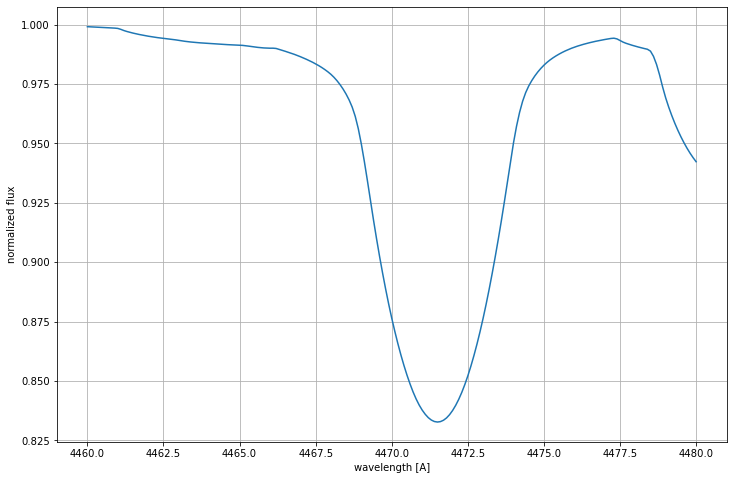

In [46]:
plt.figure(figsize=(12,8))
plt.plot(x_points, X[0])
plt.xlabel("wavelength [A]")
plt.ylabel("normalized flux")
plt.grid()
plt.show()

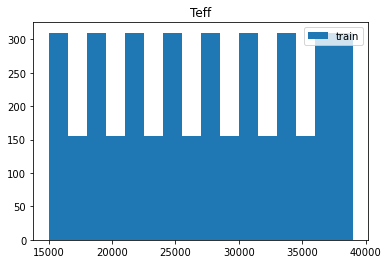

In [47]:
histograms_params(y[:,0], None, None, 0, ["train", "test", "val"], "Teff")

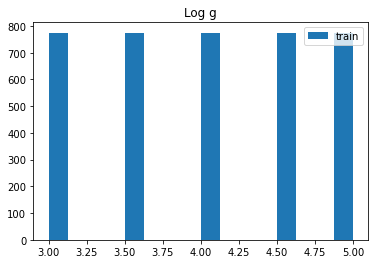

In [48]:
histograms_params(y[:,1], None, None, 0, ["train", "test", "val"], "Log g")

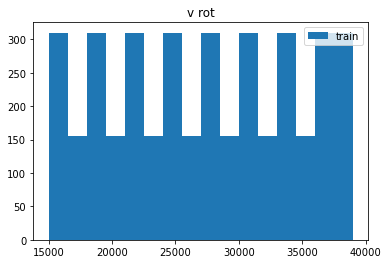

In [49]:
histograms_params(y[:,0], None, None, 0, ["train", "test", "val"], "v rot")

## Training, testing and validation sets

In [50]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y, .8, .1, .1)

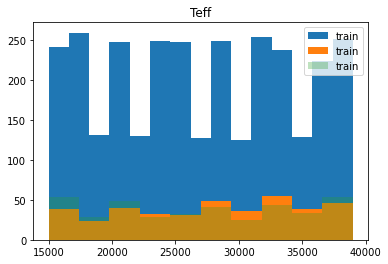

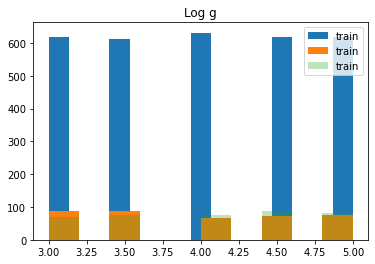

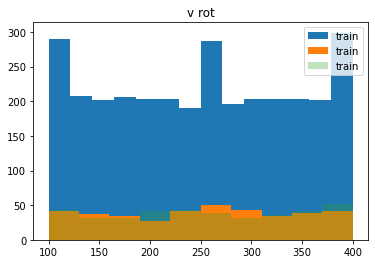

In [52]:
histograms_params(y_train[:,0], y_val[:,0], y_test[:,0], 0, ["train", "test", "val"], "Teff")
histograms_params(y_train[:,1], y_val[:,1], y_test[:,1], 0, ["train", "test", "val"], "Log g")
histograms_params(y_train[:,2], y_val[:,2], y_test[:,2], 0, ["train", "test", "val"], "v rot")